# Problem Set 3



Team: 
    Lea Schmierer 3546563;
    Angelina Basova 3704658;
    Daniel Knorr 3727033

## Exercise 1


## Exercise 2

## Exercise 3

## Exercise 4

In [9]:
#a)
try:
    import numpy
except:
    print ("This implementation requires the numpy module.")
    exit(0)

###############################################################################

"""
@INPUT:
    R     : a matrix to be factorized, dimension N x M
    P     : an initial matrix of dimension N x K
    Q     : an initial matrix of dimension M x K
    K     : the number of latent features
    steps : the maximum number of steps to perform the optimisation
    alpha : the learning rate
    beta  : the regularization parameter
@OUTPUT:
    the final matrices P and Q
"""
def matrix_factorization(R, P, Q, K, steps=5000, alpha=0.0002, beta=0.02):
    Q = Q.T
    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - numpy.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        eR = numpy.dot(P,Q)
        e = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - numpy.dot(P[i,:],Q[:,j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * ( pow(P[i][k],2) + pow(Q[k][j],2) )
        if e < 0.001:
            break
    return P, Q.T

###############################################################################

if __name__ == "__main__":
    R = [
        [1,0,3,0,0,5,0,0,5,0,4,0],
        [0,0,5,4,0,0,4,0,0,2,1,3],
        [2,4,0,1,2,0,3,0,4,3,5,0],
        [0,2,4,0,5,0,0,4,0,0,2,0],
        [0,0,4,3,4,2,0,0,0,0,2,5],
        [1,0,3,0,3,0,0,2,0,0,4,0]

        #[1,0,2,0,0,1],
        #[0,0,4,2,0,0],
        #[3,5,0,4,4,3],
        #[0,4,1,0,3,0],
        #[0,0,2,5,4,3],
        #[5,0,0,0,2,0],
        #[0,4,3,0,0,0],
        #[0,0,0,4,0,2],
        #[5,0,4,0,0,0],
        #[0,2,3,0,0,0],
        #[4,2,5,2,2,4],
        #[0,3,0,0,5,0,],
        ]

    R = numpy.array(R)

    N = len(R)
    M = len(R[0])
    K = 2

    P = numpy.random.rand(N,K)
    Q = numpy.random.rand(M,K)

    nP, nQ = matrix_factorization(R, P, Q, K)
    nR= numpy.dot(nP, nQ.T)

    print('P:')
    print(P)

    print('Q:')
    print(nQ)

    print("No I don't obtain the same matrices Q and P as shown in the lecture, because I don't have fix numbers. The optimization starts on random numbers.")

    print('R:')
    print(nR)


P:
[[2.48438448 0.38205623]
 [0.50704082 2.48624645]
 [2.51919116 0.32584383]
 [1.27511988 1.9191138 ]
 [1.31714509 1.74589048]
 [2.09624888 0.50361721]]
Q:
[[ 0.42264324  0.85574606]
 [ 1.33908239  0.4192553 ]
 [ 0.93119756  1.67239666]
 [ 0.14495697  1.59400176]
 [ 0.80971056  1.79253639]
 [ 2.01806022 -0.31778242]
 [ 0.9750425   1.4189257 ]
 [ 0.89940072  1.26025923]
 [ 1.71615733  0.5821372 ]
 [ 1.11890426  0.57554191]
 [ 1.81955317 -0.0897281 ]
 [ 2.28188493  0.88678355]]
R:
[[1.37695142 3.48697462 2.95240233 0.96912714 2.69648205 4.89222675
  2.96448986 2.71594709 4.48600378 2.99967776 4.48618849 6.00788069]
 [2.34189297 1.72134144 4.63014545 4.03658031 4.86724354 0.23315349
  4.02218534 3.58934793 2.31749837 1.99826918 0.69950157 3.36177127]
 [1.34355869 3.51001628 2.89080479 0.88456995 2.62390261 4.98033203
  2.91866663 2.67641004 4.51301419 3.0062705  4.55456492 6.03745729]
 [2.18119486 2.51208921 4.39690803 3.24390828 4.47255935 1.96340807
  3.96637596 3.56542462 3.30549386 2

[2.574773328136041]
[2.566521000564969]
[2.5582367521053753]
[2.5499209207884146]
[2.5415738528396723]
[2.5331959026953395]
[2.524787433015492]
[2.51634881469443]
[2.507880426868012]
[2.499382656917928]
[2.4908559004728597]
[2.4823005614064675]
[2.473717051832159]
[2.465105792094576]
[2.4564672107577596]
[2.4478017445899427]
[2.4391098385449146]
[2.430391945739923]
[2.42164852743006]
[2.4128800529790935]
[2.4040869998267076]
[2.3952698534521017]
[2.3864291073339254]
[2.3775652629065056]
[2.3686788295123336]
[2.359770324350786]
[2.350840272423052]
[2.3418892064732324]
[2.332917666925601]
[2.3239262018179927]
[2.314915366731314]
[2.3058857247151483]
[2.2968378462094563]
[2.287772308962341]
[2.278689697943898]
[2.2695906052561177]
[2.260475630038857]
[2.2513453783718784]
[2.242200463172951]
[2.2330415040920357]
[2.2238691274015507]
[2.2146839658827413]
[2.205486658708166]
[2.1962778513203167]
[2.1870581953064065]
[2.177828348269334]
[2.1685889736948707]
[2.159340740815093]
[2.150084324468

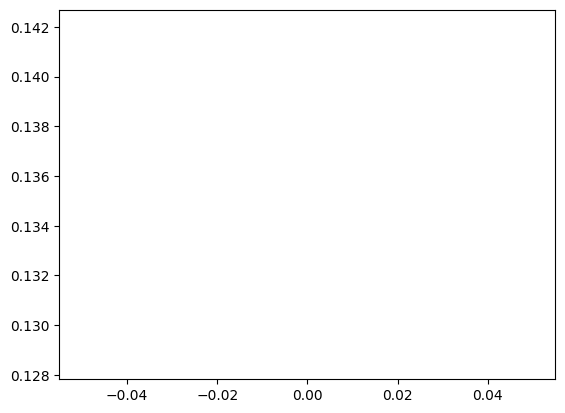

In [14]:
#b)
import numpy
import matplotlib.pyplot as plt

def matrix_factorization(R, P, Q, K, steps=5000, alpha=0.0002, beta=0.02):
    Q = Q.T
    error=[]
    for step in range(steps):
        
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - numpy.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        eR = numpy.dot(P,Q)
        e = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - numpy.dot(P[i,:],Q[:,j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * ( pow(P[i][k],2) + pow(Q[k][j],2) )
        error.append(eij)   
        print(error)        
        if e < 0.001:
            break

    print(error)
    plt.plot(error)
    plt.show()
    return P, Q.T




if __name__ == "__main__":
    R = [
        [1,0,3,0,0,5,0,0,5,0,4,0],
        [0,0,5,4,0,0,4,0,0,2,1,3],
        [2,4,0,1,2,0,3,0,4,3,5,0],
        [0,2,4,0,5,0,0,4,0,0,2,0],
        [0,0,4,3,4,2,0,0,0,0,2,5],
        [1,0,3,0,3,0,0,2,0,0,4,0]
        ]

    R = numpy.array(R)

    N = len(R)
    M = len(R[0])
    K = 2

    P = numpy.random.rand(N,K)
    Q = numpy.random.rand(M,K)

    nP, nQ = matrix_factorization(R, P, Q, K)
    nR= numpy.dot(nP, nQ.T)


## Exercise 5

## Exercise 6 Bonus